In [303]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

today = datetime.today().strftime('%Y-%m-%d')
start_date = '2019-01-01'

eth_df = yf.download('BTC-USD',start_date, today)

eth_df.tail()

In [304]:
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2010-01-01'

eth_df = yf.download('ETH-USD',start_date, today)

eth_df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-15,"$3,309.84","$3,364.54","$3,278.67","$3,330.53","$3,330.53",9619999078
2022-01-16,"$3,330.39","$3,376.40","$3,291.56","$3,350.92","$3,350.92",9505934874
2022-01-17,"$3,350.95","$3,355.82","$3,157.22","$3,212.30","$3,212.30",12344309617
2022-01-18,"$3,212.29","$3,236.02","$3,096.12","$3,164.03","$3,164.03",13024154091
2022-01-19,"$3,163.85","$3,171.16","$3,055.21","$3,095.83","$3,095.83",13187424144


In [305]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1533 entries, 2017-11-09 to 2022-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1533 non-null   float64
 1   High       1533 non-null   float64
 2   Low        1533 non-null   float64
 3   Close      1533 non-null   float64
 4   Adj Close  1533 non-null   float64
 5   Volume     1533 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 83.8 KB


In [306]:
eth_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [307]:
eth_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [308]:
eth_df.reset_index(inplace=True)
eth_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [309]:
df = eth_df[["Date", "Open"]]

new_names = {
    "Date": "ds", 
    "Open": "y",
}

df.rename(columns=new_names, inplace=True)

In [310]:
# plot the open price

x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Ethereum Open Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -48.6287
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4397.22    0.00288103       826.431      0.3338      0.3338      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4506.21    0.00664101       326.508      0.7425      0.7425      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4604.5      0.143197       2655.26      0.4432           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4675.88     0.0105203       1363.02      0.2833           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4714.52     0.0139974       912.036      0.3377           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

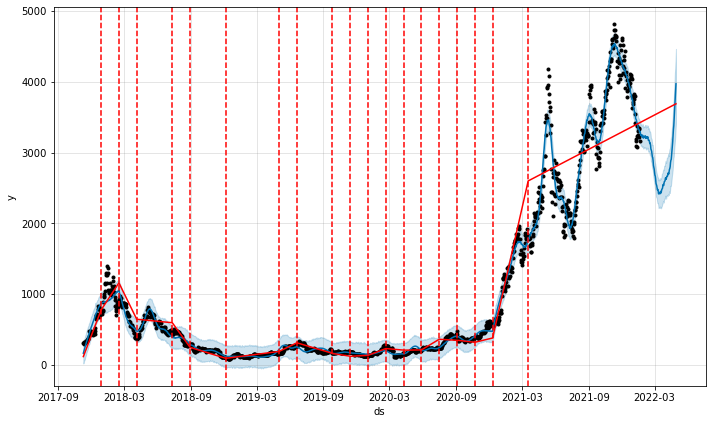

In [311]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.3,
    yearly_seasonality = True
)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [312]:
future = m.make_future_dataframe(periods = 200)


In [313]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1728,2022-08-03,"$3,482.52","$2,163.66","$4,833.44"
1729,2022-08-04,"$3,564.23","$2,257.11","$4,968.18"
1730,2022-08-05,"$3,607.33","$2,220.15","$5,012.24"
1731,2022-08-06,"$3,624.08","$2,236.55","$5,002.87"
1732,2022-08-07,"$3,689.84","$2,242.05","$5,133.40"


In [314]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

forecast[forecast['ds'] == next_day]['yhat'].item()

3279.267120879692

In [315]:
plot_plotly(m, forecast)

In [316]:
plot_components_plotly(m, forecast)